In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
# Presentation theme RGB: 246,112,49
# Microsoft colors: Green: 127,186,0; Blue: 0,164,239; Yellow: 255,185,0

In [217]:
movies_df = pd.read_pickle('./movies_df.pkl')

In [218]:
movies_df.describe()

,duration,budget,domestic_income,worldwide_income,imdb_user_score,metacritic_user_score,Sci-Fi,Crime,Musical,Adventure,...,Mystery,Animation,Drama,Western,War,History,domestic_roi,worldwide_roi,domestic_profit_loss,worldwide_profit_loss
count,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,...,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2.525000e+03,2525.000000,2525.000000
mean,103.897426,32.492792,45.246337,96.209228,287.381782,6.484271,0.057822,0.164356,0.010693,0.150891,...,0.077228,0.055050,0.534653,0.007921,0.009109,0.017426,473.281188,8.156345e+02,12.754257,63.717109
std,16.169595,44.652535,79.954127,205.705986,457.218237,1.386653,0.233452,0.370672,0.102873,0.358014,...,0.267005,0.228122,0.498896,0.088663,0.095024,0.130877,14328.828963,2.566890e+04,53.169677,172.146659
min,63.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-176.900000,-111.000000
25%,92.000000,4.000000,0.700000,1.200000,55.000000,5.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.400000e+01,-6.600000,-2.300000
50%,101.000000,17.000000,17.500000,25.400000,151.000000,6.484271,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,85.000000,1.460000e+02,-0.300000,4.700000
75%,113.000000,40.000000,53.700000,94.900000,324.000000,7.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,190.000000,3.350000e+02,17.800000,57.200000
max,219.000000,356.000000,936.700000,2797.800000,8302.000000,9.400000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,719459.000000,1.289039e+06,691.700000,2553.000000


In [219]:
unique_genres = set([x for genre in [genres.split(', ') for genres in movies_df['genre']] for x in genre])
genres = list(unique_genres)

In [234]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.10)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# Choosing a Genre
Below you will find several profit and audience score oriented charts looking at which movie genres perform the best. Our goal in this section is to recommend one or two types of movie project types with the goal of maximizing profit and popularity.

In [235]:
wpl_noutlier_df = remove_outlier(movies_df, 'worldwide_profit_loss')
avg_worldwide_pl_by_genre = []
for genre in genres:
    avg_worldwide_pl_by_genre.append((wpl_noutlier_df[wpl_noutlier_df[genre]==1]\
                                      .worldwide_profit_loss.mean(), genre))
avg_worldwide_pl_by_genre.sort()
genre = [name[1] for name in avg_worldwide_pl_by_genre]
avg_pl = [pl[0] for pl in avg_worldwide_pl_by_genre]

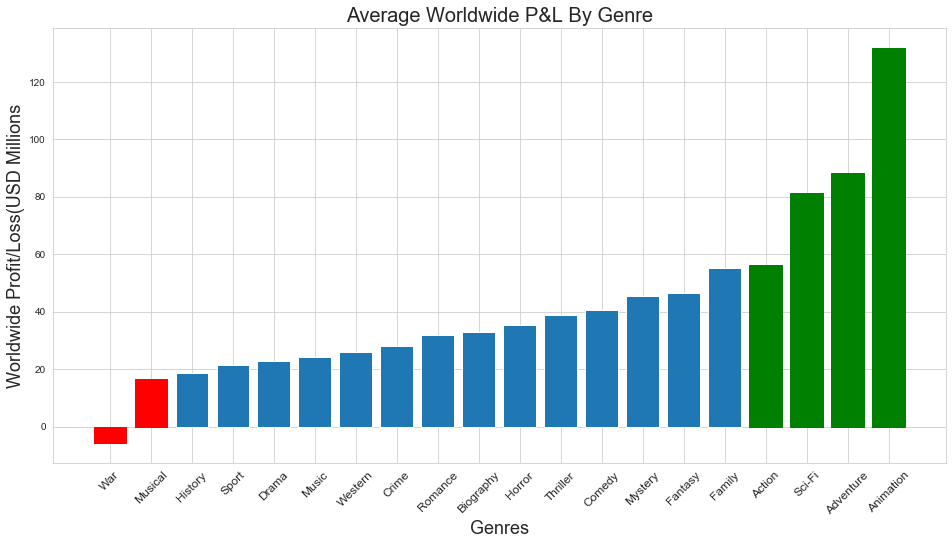

In [236]:
fig, wpl=plt.subplots(figsize=(16,8))
bars = wpl.bar(x=genre, height=avg_pl)
plt.xlabel('Genres', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Worldwide Profit/Loss(USD Millions', fontsize=18)
plt.title("Average Worldwide P&L By Genre", fontsize=20)
bars[0].set_color('r')
bars[1].set_color('r')
bars[-4].set_color('g')
bars[-3].set_color('g')
bars[-2].set_color('g')
bars[-1].set_color('g')
plt.show(wpl)

In [237]:
wroi_noutlier_df = remove_outlier(movies_df, 'worldwide_roi')
avg_worldwide_roi_by_genre = []
for genre in genres:
    avg_worldwide_roi_by_genre.append((wroi_noutlier_df[wroi_noutlier_df[genre]==1]\
                                      .worldwide_roi.mean(), genre))
avg_worldwide_roi_by_genre.sort()
genre_r = [name[1] for name in avg_worldwide_roi_by_genre]
avg_roi = [roi[0] for roi in avg_worldwide_roi_by_genre]

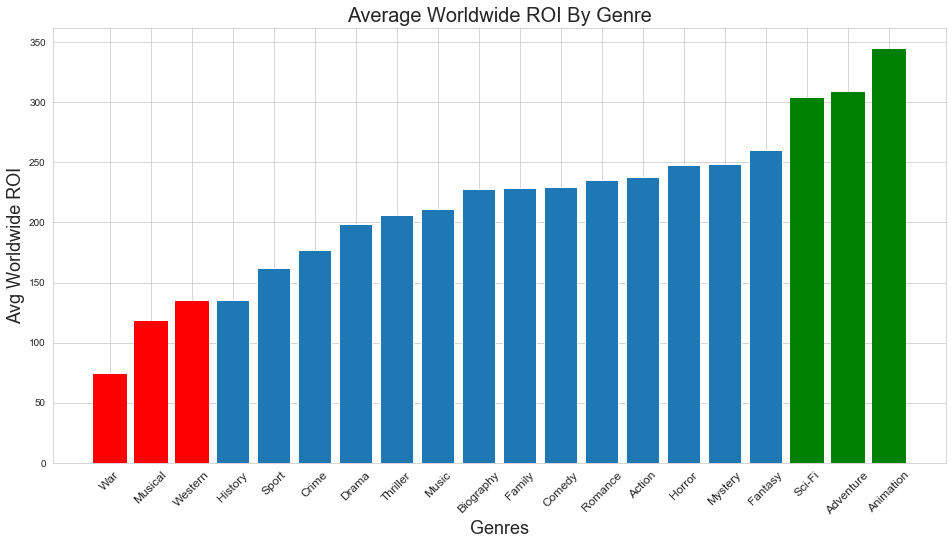

In [238]:
fig, wroi=plt.subplots(figsize=(16,8))
bars2 = wroi.bar(x=genre_r, height=avg_roi)
plt.xlabel('Genres', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Avg Worldwide ROI', fontsize=18)
plt.title("Average Worldwide ROI By Genre", fontsize=20)
bars2[0].set_color('r')
bars2[1].set_color('r')
bars2[2].set_color('r')
bars2[-3].set_color('g')
bars2[-2].set_color('g')
bars2[-1].set_color('g')
plt.show(wroi)

## Movie Genre Historical Trends
Below is a historical timeseries going back to 2000, with annual movie release counts by our most porfitable genres. Nothing meaningful or relevant to our recommendations however.

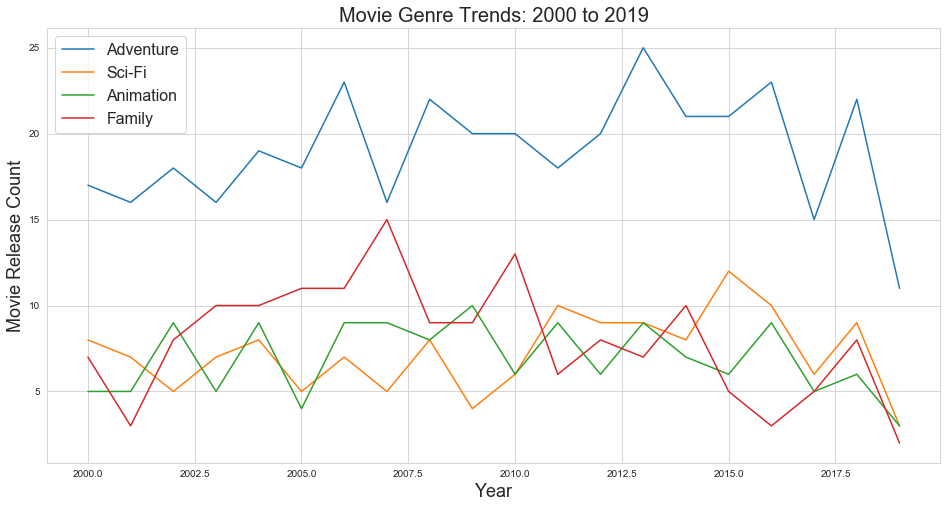

In [239]:
profit_genres = ['Adventure', 'Sci-Fi', 'Animation', 'Family']
fig, ax = plt.subplots(figsize = (16,8))
for genre in profit_genres:
    data = dict(movies_df[movies_df[genre]==1].release_date.dt.year.value_counts().sort_index())
    x = list(data.keys())
    y = list(data.values())
    ax.plot(x, y, label=genre)
ax.legend(fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Movie Release Count', fontsize=18)
plt.title('Movie Genre Trends: 2000 to 2019', fontsize=20)
plt.show()

## Correlations
There are several meaningful relationships found when correlating the dataset using the heatmap plot method.
* The Metacritic user score, calculated as an avg rating between 0 and 10, has no correlation with domestic or worldwide box office at all.
* The IMDB user score, however, is strongly correlated with box office performance. Their scoring method is weighted in favor of volume of ratings, as well as average score.
* Domestic and worldwide box office performance is strongly correlated with budget.

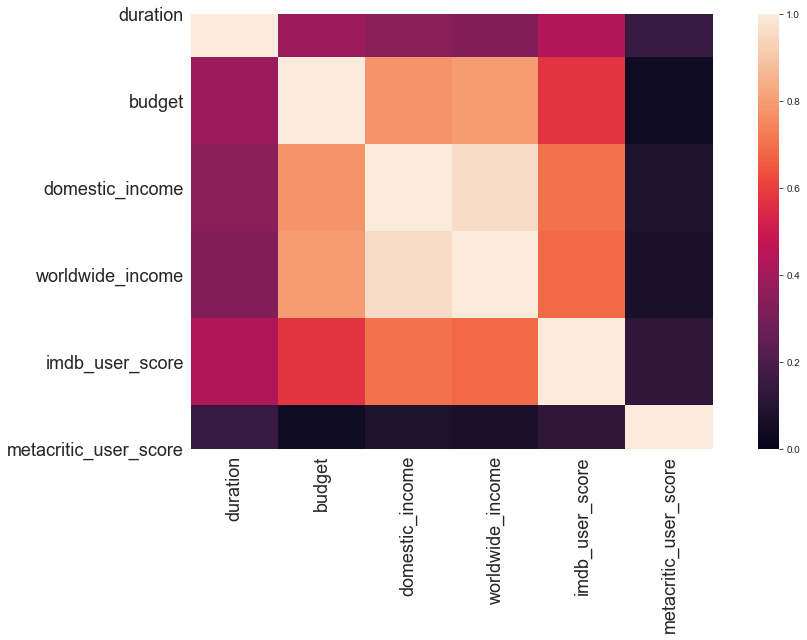

In [240]:
six_cols = list(movies_df.describe())[0:6]
plt.figure(figsize = (16,8))
sns.heatmap(movies_df[six_cols].corr(), square=True, vmin=0, vmax=1)
plt.yticks(fontsize=18, rotation = 0)
plt.xticks(fontsize=18)
plt.show()

## Nearing Our Conclusion
Based on the above analysis, if we were to choose a movie genre by audience score and popularity, we would use the IMDb score. Below, we will complete the process of identifying a recommended genre set. 

In [241]:
avg_imdb_score_by_genre = []
for genre in genres:
    avg_imdb_score_by_genre.append((movies_df[movies_df[genre]==1].imdb_user_score.mean(), genre))
avg_imdb_score_by_genre.sort()
genre_s = [name[1] for name in avg_imdb_score_by_genre]
avg_imdb = [score[0] for score in avg_imdb_score_by_genre]

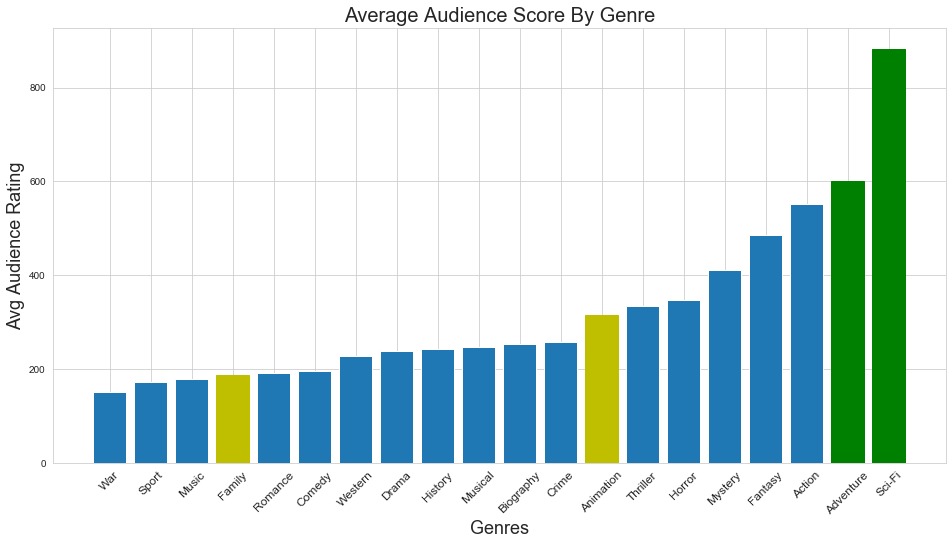

In [242]:
fig, imdb=plt.subplots(figsize=(16,8))
bars2 = imdb.bar(x=genre_s, height=avg_imdb)
plt.xlabel('Genres', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Avg Audience Rating', fontsize=18)
plt.title("Average Audience Score By Genre", fontsize=20)
bars2[3].set_color('y')
bars2[12].set_color('y')
bars2[-2].set_color('g')
bars2[-1].set_color('g')
plt.show(imdb)

## Choosing a Genre Conclusion
Based on the genre analysis above, we have drawn the following conclusions:
* Sci-Fi & Action/Adventure movies are the most profitable *and* popular
* Going off profitability alone, animated movies perform the best by a significant margin, but do not have high audience ratings.
* Microsoft should choose to create a Sci-Fi Adventure movie, or an Animated Family movie.
* We recommend that Microsoft create a Sci-Fi Adventure movie for the first project, due to them generating more media attention and audience popularity.

# Average Runtime Analysis
In this section, we take a quick look at the average runtime/movie length (in minutes) of the most popular movie genre, Sci-Fi, in order to recommend a runtime range for Microsoft's movie project.

In [243]:
sci_fi_runtimes = movies_df[movies_df['Sci-Fi']==1].duration
sci_fi_runtimes.mean()

112.67808219178082

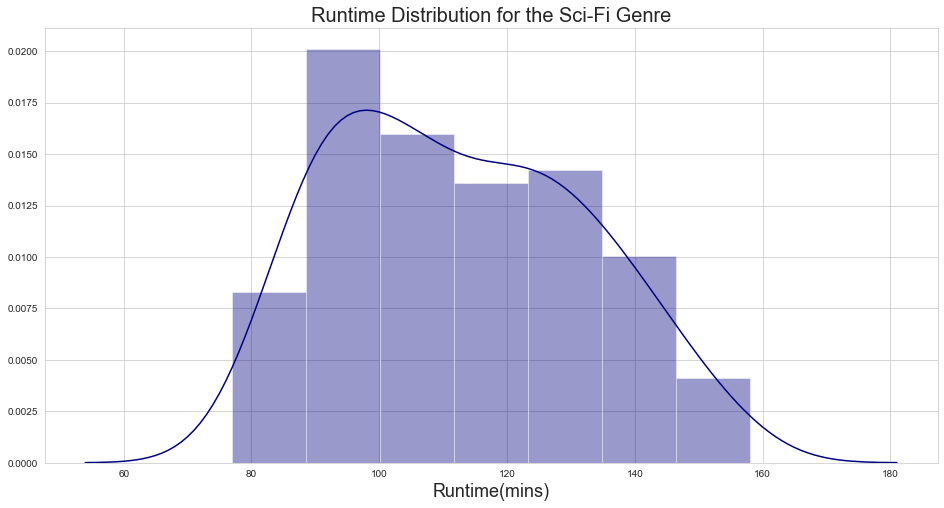

In [244]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,8))
art = sns.distplot(sci_fi_runtimes, color='navy')
plt.xlabel('Runtime(mins)', fontsize=18)
plt.title("Runtime Distribution for the Sci-Fi Genre", fontsize=20)
plt.show(art)

## Runtime Conclusion
Based on the above analysis, we have determined that an optimal movie duration would be between 100 and 120 minutes (average Sci-Fi movie length is 112 mins).

# Top 10 Directors by Profitability and Audience Score
Below, we will look at the top 10 highest performing directors in the Sci-Fi genre by two metrics; ROI, and IMDb audience rating.

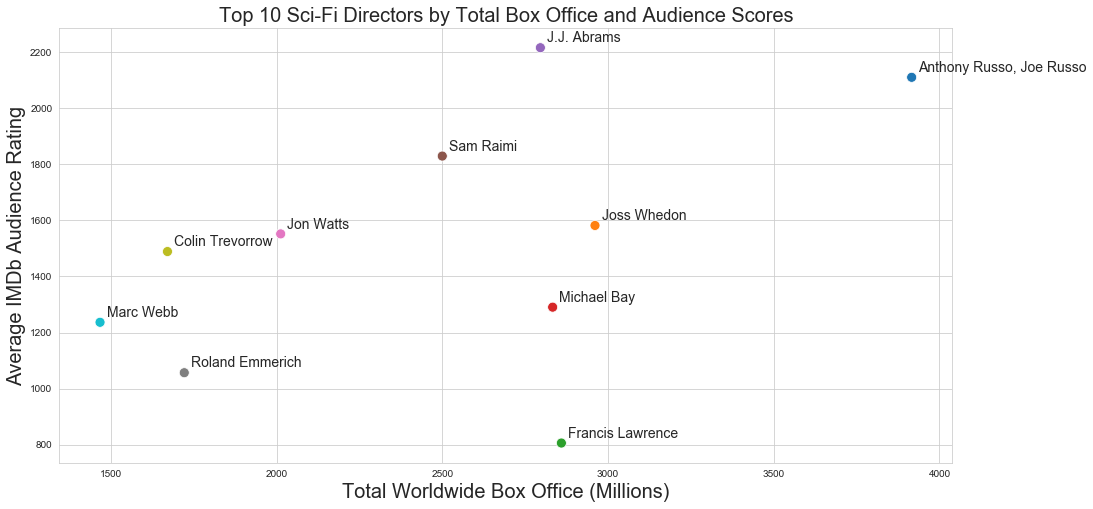

In [245]:
data1 = movies_df[movies_df['Sci-Fi']==1].groupby('director')\
                                         .agg({'worldwide_income':'sum', 'imdb_user_score':'mean'})\
                                         .sort_values("worldwide_income", ascending=False).head(10)
x1 = list(data1.worldwide_income)
y1 = list(data1.imdb_user_score)
fig, ax2 = plt.subplots(figsize=(16,8))
sns.scatterplot(x1, y1, hue=data1.index, s=100, axes=ax2)
for i,txt in enumerate(data1.index):
    ax2.annotate(txt, (x1[i]+20,y1[i]+20), fontsize=14)
plt.xlabel('Total Worldwide Box Office (Millions)', fontsize=20)
plt.ylabel('Average IMDb Audience Rating', fontsize=20)
ax2.legend().remove()
plt.title('Top 10 Sci-Fi Directors by Total Box Office and Audience Scores', fontsize=20)
plt.show()

## Director Analysis Conclusion:
Based on the above analysis, assuming that a director that has been involved in the Sci-Fi genre before would be a better fit creatively, there are many great directors to choose from in the Sci-Fi genre. The top 3 directors to reach out to, considering total worldwide box office and average audience score, are:
* Anthony & Joe Russo (Russo Brothers)
* J.J. Abrams
* Joss Whedon

# Best Release Month for Maximizing Domestic Box Office
Our last analysis of the movie dataset involves a focused look at release dates; specifically which months of the year have the highest average domestic box office. This is a look across the entire dataset, and not specific genres.

In [246]:
rmbo_noutlier_df = remove_outlier(movies_df, 'domestic_income')
months = [1,2,3,4,5,6,7,8,9,10,11,12]
avg_domestic_by_rmonth = []
for month in months:
    avg_domestic_by_rmonth.append((rmbo_noutlier_df[rmbo_noutlier_df['release_date'].dt.month==month]\
                                      .domestic_income.mean(), month))
rmonths = [month[1] for month in avg_domestic_by_rmonth]
avg_dbo = [dbo[0] for dbo in avg_domestic_by_rmonth]

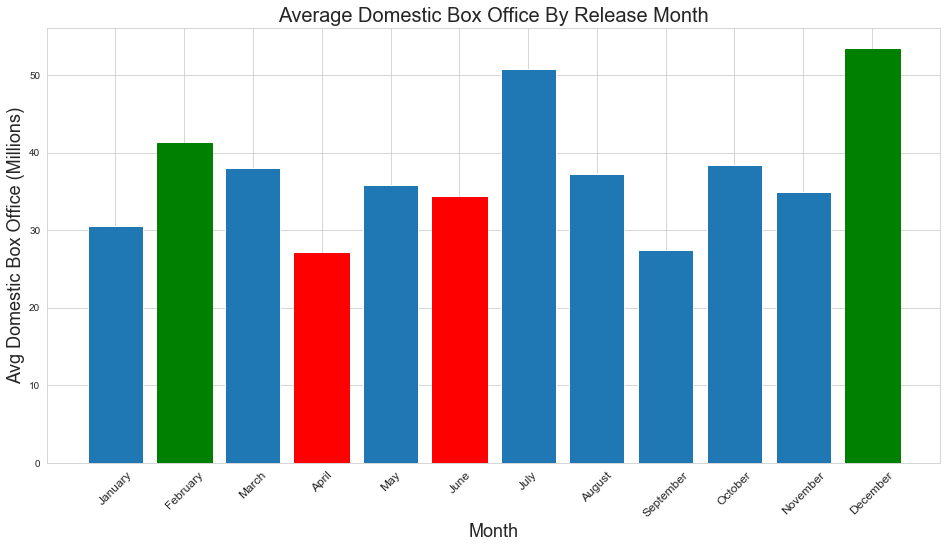

In [247]:
months_txt = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',\
             'October', 'November', 'December']
fig, rm=plt.subplots(figsize=(16,8))
bars3 = rm.bar(x=rmonths, height=avg_dbo)
plt.xlabel('Month', fontsize=18)
plt.xticks(list(range(1,13)), months_txt, rotation=45, fontsize=12)
plt.ylabel('Avg Domestic Box Office (Millions)', fontsize=18)
plt.title("Average Domestic Box Office By Release Month", fontsize=20)
bars3[3].set_color('r')
bars3[5].set_color('r')
bars3[1].set_color('g')
bars3[-1].set_color('g')
plt.show(rm)

In [248]:
movies_df.head()

,imdb_id,title,release_date,genre,duration,director,budget,domestic_income,worldwide_income,imdb_user_score,...,Mystery,Animation,Drama,Western,War,History,domestic_roi,worldwide_roi,domestic_profit_loss,worldwide_profit_loss
0,tt0035423,Kate & Leopold,2002-04-05,"Comedy, Fantasy, Romance",118,James Mangold,48.0,47.1,76.0,330.0,...,0,0,0,0,0,0,98,158,-0.9,28.0
1,tt0083907,The Evil Dead,2018-10-31,Horror,85,Sam Raimi,0.3,2.4,2.9,802.0,...,0,0,0,0,0,0,686,827,2.0,2.5
2,tt0113026,The Fantasticks,2000-09-22,"Musical, Romance",86,Michael Ritchie,10.0,0.0,0.0,70.0,...,0,0,0,0,0,0,0,0,-10.0,-10.0
3,tt0118589,Glitter,2001-09-21,"Drama, Music, Romance",104,Vondie Curtis-Hall,22.0,4.3,5.3,314.0,...,0,0,1,0,0,0,19,24,-17.7,-16.7
4,tt0120188,Three Kings,2000-04-21,"Action, Adventure, Comedy",114,David O. Russell,75.0,60.7,107.8,563.0,...,0,0,0,0,0,0,81,144,-14.3,32.8
